>

# Project: Investigate a Dataset - No-Show Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row:  
01 - PatientId  
Identification of a patient  
02 - AppointmentID  
Identification of each appointment  
03 - Gender  
Male or Female . Female is the greater proportion, woman takes way more care of their health in comparison to man.  
04 - ScheduledDay  
The day of the actuall appointment, when they have to visit the doctor.  
05 - AppointmentDay  
The day someone called or registered the appointment, this is before appointment of course.  
06 - Age  
How old is the patient.  
07 - Neighbourhood  
Where the appointment takes place.  
08 - Scholarship  
True of False . whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia  
09 - Hipertension  
True or False  
10 - Diabetes  
True or False  
11 - Alcoholism  
True or False  
12 - Handcap  
True or False  
13 - SMS_received  
1 or more messages sent to the patient.  
14 - No-show  
True or False.  


### Question(s) for Analysis
>-What factors are crucial to predict if a patient will show up for their scheduled appointment?   
-Does having a scholarship influence your showing up to the appointment?  
-Does illness(hypertension, diabetes, alcoholism, handicap) have a direct impact on the patient's showing up to the appointment?  


In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
# Importing the libraries to help facilitate the data analysis process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I will make sure that I **document my data cleaning steps in mark-down cells precisely and justify my cleaning decisions.**

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
# .info() method is used to know the number of columns and rows.
# Also, it is used to know the datatype of each column as to decide 
# if there will be any datatype conversions
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Confirm that there are no null values
df.isnull().sum().any()

False

In [6]:
# .head() method is used to take a sample from the actual data and
# decide if there will be changes
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# .describe() method is used to determine if there are unusual data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Find how many patients are aged -1 and 115
df.groupby(['Age', 'PatientId'])['Age'].count()

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [9]:
# This shows that the same patient can schedule different appointments which is an interesting insight
df.PatientId.nunique()

62299

In [10]:
# check that AppointmentID is a unique row identifier
df.AppointmentID.nunique()

110527

In [11]:
# 0 Handcap means the patient has zero handicaps, 1 means the patient has one handicap, etc.
df["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

## Data Wrangling Conclusion   
> Using the .info() method, there were no null or missing values from the data.  
However, the .head() and .describe() method showed a couple of problems with the data.  
------------------------------------------------------------------------------------------  
Changes:-  
-Names of the columns will be lowercased and separated by underscores for generalization.  
-Hipertension and Handcap were mispelled, so they will be renamed.
-Appointment ID is irrelevant to analyzing the data, and Appointment Day contains meaningless information, so both will be dropped.  
-There was an Age of -1 which will be dropped.    
-There are five appointments of 115 years old patients; the patient with an ID of **31963211613981** scheduled four appointments (two were on the same day, and the other two were on other days)  
-The age 115 seems suspicious which means that it will be dropped.  
-Day columns need to be transformed to datetime types.  
-Handicap seems to be a categorical variable because its values range from 0 till 4.  
-Gender, Handicap, and Neighbourhood need to be transformed to categorical type.   
-Boolean columns Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived, and No-Show should be converted to bool types.  

-------------------------------------------------------------------------------------------------------------------------------


### Data Cleaning
> The suggestions stated in the "Data Wrangling" section will be addressed in this section.  
 

In [12]:
# lowercase the column names
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
# .rename() method was used to manually change the column names as per the mentioned preferences
df.rename(columns = {"patientid" : "patient_id", "scheduledday" : "scheduled_day", "hipertension" : "hypertension", "handcap" : "handicap", "no-show" : "no_show", "neighbourhood" : "neighborhood" }, inplace = True)
# .drop() method was used to drop/remove the appointment id and appointment day columns
df.drop(["appointmentid", "appointmentday"], axis=1, inplace=True)

In [13]:
# confirmation
df.head()

,patient_id,gender,scheduled_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Removing rows with ages of -1 and 115
df.drop(df[(df['age'] == -1)].index, inplace=True)
df.drop(df[(df['age'] == 115)].index, inplace=True)
# Checking that they were removed
df.groupby(['age', 'patient_id'])['age'].count()

age  patient_id  
0    2.699191e+08    2
     3.424788e+08    1
     4.279622e+08    1
     1.192462e+09    1
     1.637951e+09    2
                    ..
100  3.939642e+11    1
     9.739430e+12    2
     5.578313e+13    1
102  2.342836e+11    1
     9.762948e+14    1
Name: age, Length: 63464, dtype: int64

In [15]:
# Converting the datatype from object/str to datetime
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])
# Converting the datatype from object/str to category
for i in ["gender", "handicap", "neighborhood"]:
    df[i] = df[i].astype("category")
# Changing the values from "No" --> 0 and "Yes" --> 1 to match the rest of the columns containing 0's and 1's
df["no_show"].replace({"No" : 0, "Yes" : 1}, inplace=True)
# Converting the datatype from int64 to bool which automatically changes 0's --> False and 1's --> True
for i in ["scholarship", "hypertension", "diabetes", "alcoholism", "sms_received", "no_show"]:
    df[i] = df[i].astype("bool")

In [16]:
# Confirming the previous changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 12 columns):
patient_id       110521 non-null float64
gender           110521 non-null category
scheduled_day    110521 non-null datetime64[ns, UTC]
age              110521 non-null int64
neighborhood     110521 non-null category
scholarship      110521 non-null bool
hypertension     110521 non-null bool
diabetes         110521 non-null bool
alcoholism       110521 non-null bool
handicap         110521 non-null category
sms_received     110521 non-null bool
no_show          110521 non-null bool
dtypes: bool(6), category(3), datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 4.3 MB


## Research Questions

## <a href="#q1"> 1) What factors are crucial to predict if a patient will show up for their scheduled appointment?</a>    
## <a href="#q2"> 2) Does having a scholarship influence your showing up to the appointment?</a>  
## <a href="#q3"> 3) Does illness(hypertension, diabetes, alcoholism, handicap) have a direct impact on the patient's showing up to the appointment?</a>  


<a id="eda"></a>
## Exploratory Data Analysis (EDA)



<a id ="q1"></a>
### What factors are crucial to predict if a patient will show up for their scheduled appointment?

In [17]:

def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    """
    5 required arguments and 2 key arguments with a default value of "None" 
    Precondition:-
    dfdata = dataframe used to plot on
    xdata = column on the x-axis
    ydata = column on the y-axis
    gxlabel = label of the x-axis
    gylabel = label of the y-axis
    gtitle = graph title
    gcolor = graph color
    gpalette = palette for each value on the x-axis
    
    Postcondition:-
    A count plot is printed with all the given data arguments
    """
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g

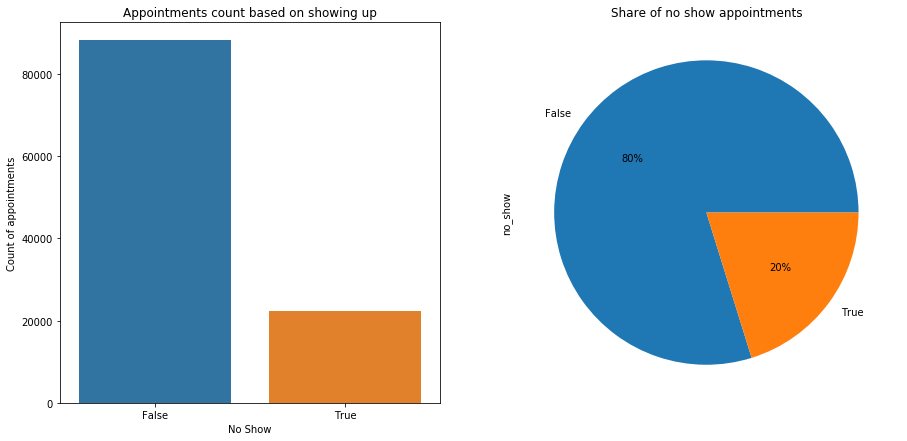

In [18]:
# let's first look at details of individual patient characteristics and of our dependent variable: no_show

# share of NoShows on all appointments
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
count_plot(df, "no_show", "No Show", "Count of appointments", "Appointments count based on showing up")

plt.subplot(1,2,2)
df["no_show"].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Share of no show appointments')
plt.show()

In [19]:
# calculate total counts of no shows in data
# Gender was used as a quick example, any other column will produce the same result
no_show_totals = df.groupby('no_show')["gender"].count()
no_show_totals

no_show
False    88205
True     22316
Name: gender, dtype: int64

In [20]:
# Using the .sum() method, all "True" values of no_show are going to be summed
# To avoid confusion, the "True" values of no_show are the values of the patients 
# that did **not** show up to their appointments 
no_show_proportions = df["no_show"].sum()/no_show_totals.sum() * 100
no_show_proportions

20.19163778829363

**Approximately 20%** of the patients did **not** show up to their appointments

In [21]:
df.corr().style.background_gradient(cmap='Reds')

,patient_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
patient_id,1,-0.00413863,-0.00287501,-0.00648679,0.00160988,0.0110148,-0.00978437,-0.00142281
age,-0.00413863,1,-0.0924369,0.504726,0.292509,0.0958616,0.0126764,-0.060497
scholarship,-0.00287501,-0.0924369,1,-0.0197307,-0.0248986,0.0350194,0.00118811,0.0291501
hypertension,-0.00648679,0.504726,-0.0197307,1,0.433096,0.0879722,-0.00630911,-0.0356727
diabetes,0.00160988,0.292509,-0.0248986,0.433096,1,0.0184709,-0.0145554,-0.0151696
alcoholism,0.0110148,0.0958616,0.0350194,0.0879722,0.0184709,1,-0.0261511,-0.000188917
sms_received,-0.00978437,0.0126764,0.00118811,-0.00630911,-0.0145554,-0.0261511,1,0.126478
no_show,-0.00142281,-0.060497,0.0291501,-0.0356727,-0.0151696,-0.000188917,0.126478,1


The correlation table's dark regions indicate that both variables are **positively correlated.**  
>It can be concluded that hypertension and age, hypertension and diabetes, and diabetes and age are positively correlated.


# Age vs Hypertension

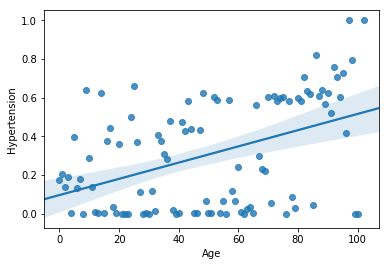

In [22]:
# age hypertension scatter with line fit
# there are more people with hypertension among older patients, as correlation of 0.5 from above suggests
hypertension_mean = df["hypertension"].groupby(df["age"]).mean()
ages = df["age"].unique()
sns.regplot(x = ages, y = hypertension_mean)
plt.xlabel("Age")
plt.ylabel("Hypertension")
plt.show()

# Age vs Diabetes

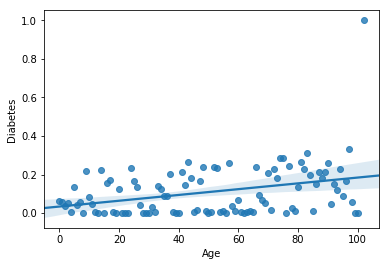

In [23]:
# age diabetes scatter with line fit
# there are more people with diabetes among older patients
diabetes_mean = df["diabetes"].groupby(df["age"]).mean()
ages = df["age"].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel("Age")
plt.ylabel("Diabetes")
plt.show()

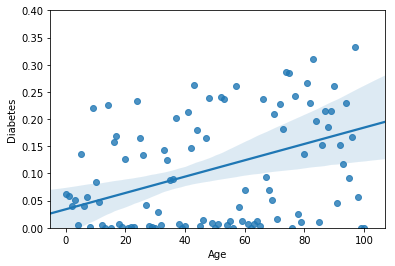

In [24]:
# the outlier is caused by having only one appointment with a patient aged 99 years or above and this patient is diabetic
# repeating the above, but cutting out the one outlier appointment to see the correlation better
diabetes_mean = df["diabetes"].groupby(df["age"]).mean()
ages = df["age"].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel("Age")
plt.ylabel("Diabetes")
plt.ylim(0,0.4)
plt.show()

# Age vs Count of Appointments

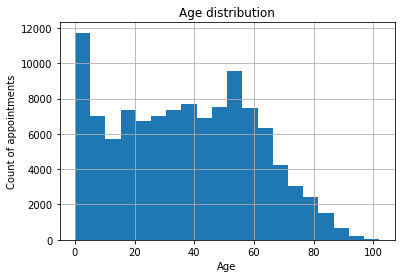

In [25]:
# age distribution
# young people have many appointments, which could be because of a number of mandatory medical visits at that age
g = df["age"].hist(bins=20);
g.set(xlabel = 'Age', ylabel = 'Count of appointments', title = 'Age distribution')
plt.show()

# Age vs Scholarship

In [26]:
# barplot function
def bar_plot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    """
    5 required arguments and 2 key arguments with a default value of "None" 
    Precondition:-
    dfdata = dataframe used to plot on
    xdata = column on the x-axis
    ydata = column on the y-axis
    gxlabel = label of the x-axis
    gylabel = label of the y-axis
    gtitle = graph title
    gerrwidth = thickness of error bar lines (and caps).
    gpalette = palette for each value on the x-axis
    
    Postcondition:-
    A bar plot is printed with all the given data arguments
    
    """
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

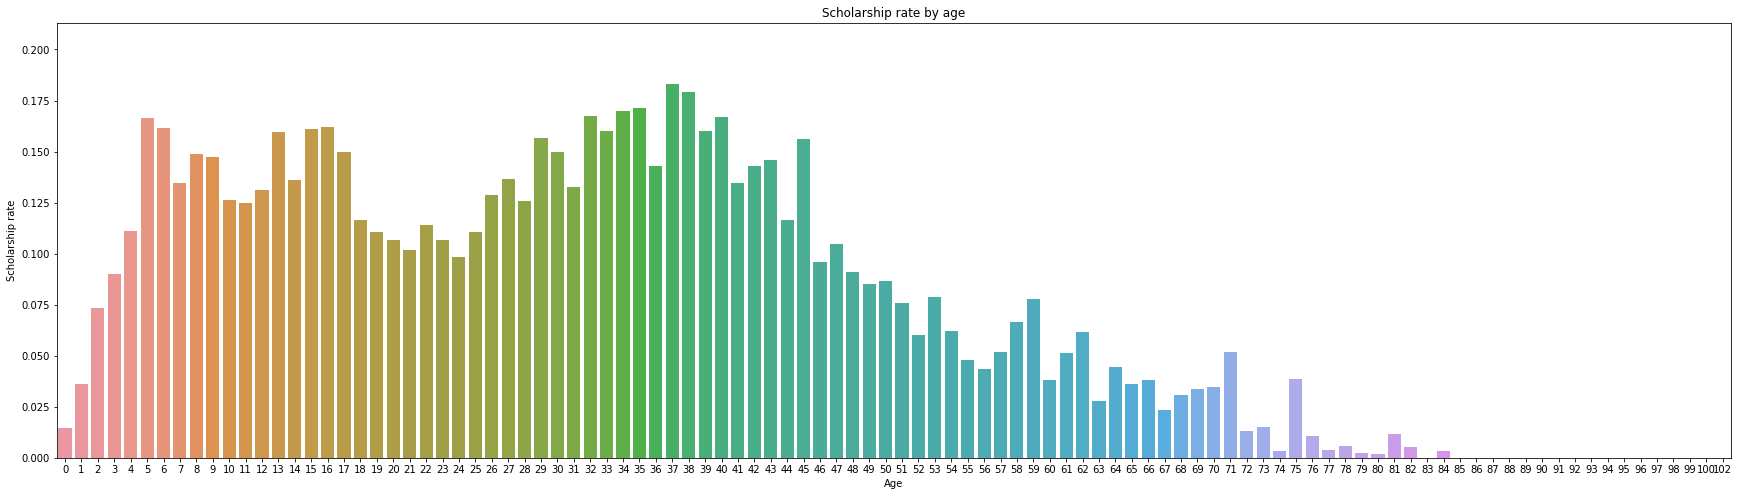

In [27]:
# proportion of appointments of patients on scholarship by age
# it might be the case that scholarship is aimed predominantly at children and parents of children based on the plot
plt.figure(figsize=(30,8))
bar_plot(df["age"], df["scholarship"], 'Age', 'Scholarship rate', 'Scholarship rate by age', 0)
plt.show() 

# Age vs Alcoholism

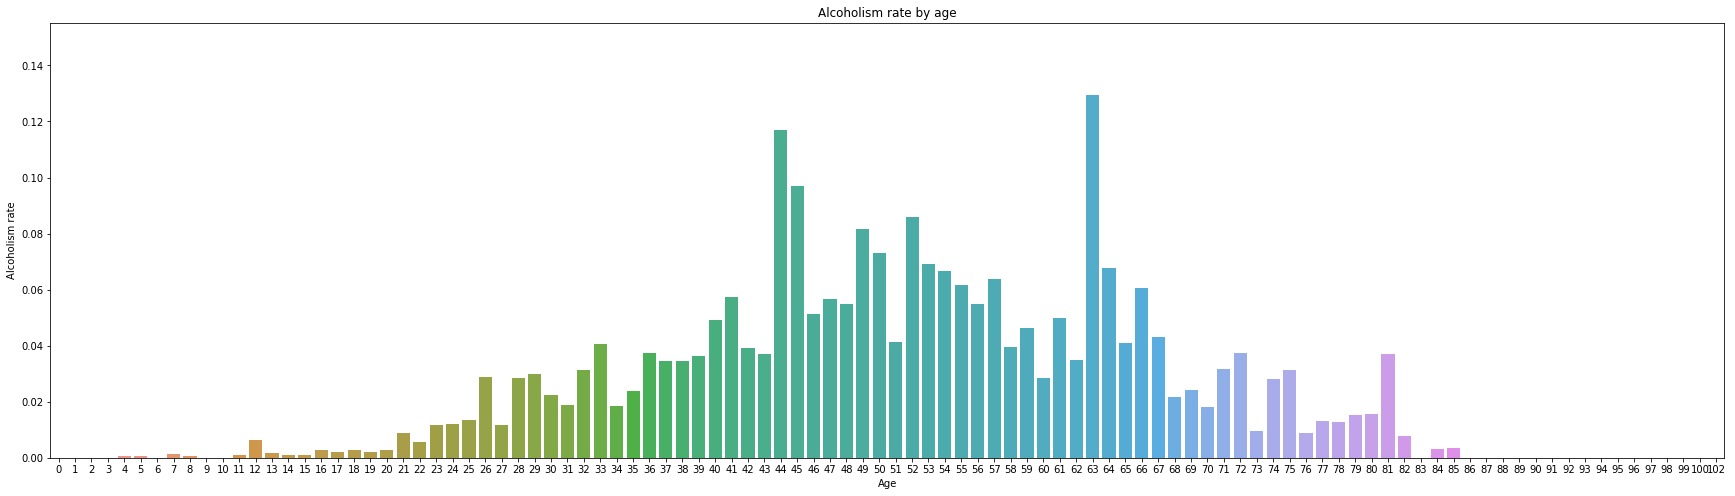

In [28]:
# how alcoholism is distributed among patients scheduling appointments by age
# the most endangered group are patients between their 40s and 60s
plt.figure(figsize=(30,8))
bar_plot(df["age"], df["alcoholism"], "Age", "Alcoholism rate", "Alcoholism rate by age", 0)
plt.show()

# Age vs No Show

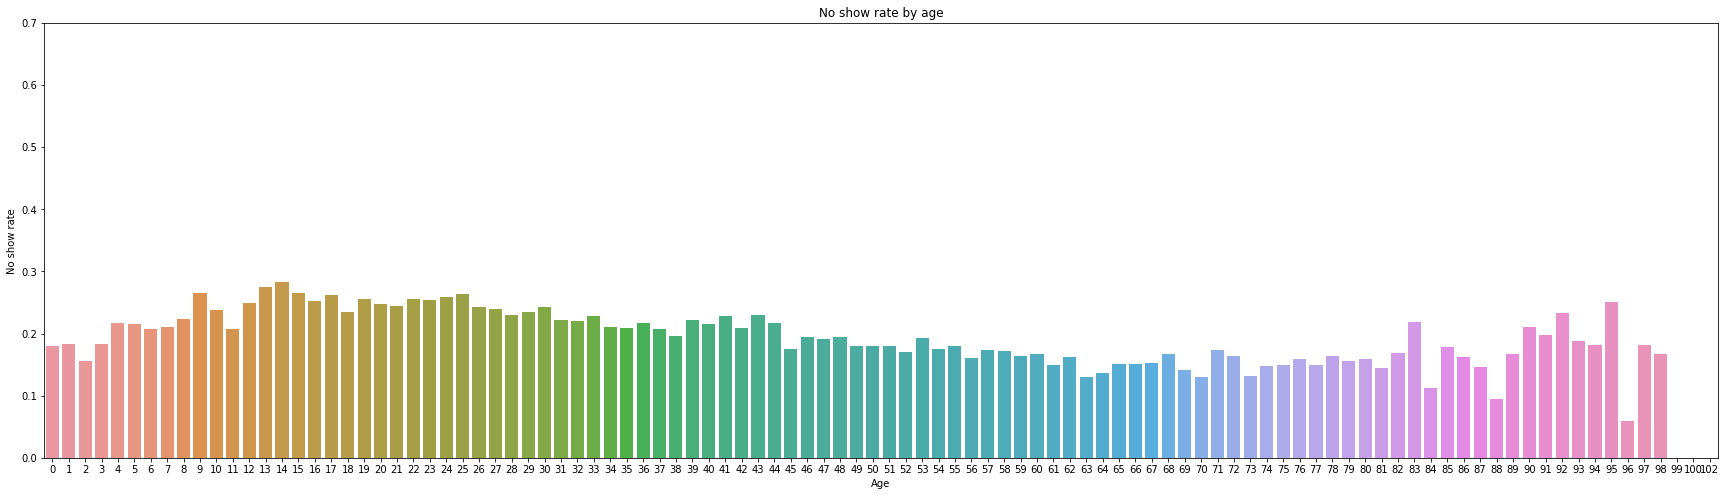

In [29]:
# there seems to be a decreasing no show rate as age increases between ages 15-80
plt.figure(figsize=(30,8))
plt.ylim(0,0.7)
bar_plot(df["age"], df["no_show"], "Age", "No show rate", "No show rate by age", 0)
plt.show()

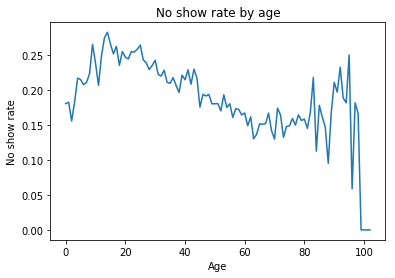

In [30]:
# the above is also confirmed by the following plot
# there are fewer data points for ages higher than 90 (check histogram above),
# that is why there is a steep decrease after approximately the 95 checlpoint
y_no_show_means = df["no_show"].groupby(df["age"]).mean()
x_age = df["age"].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_no_show_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.show()

# Gender vs Count of Appointments

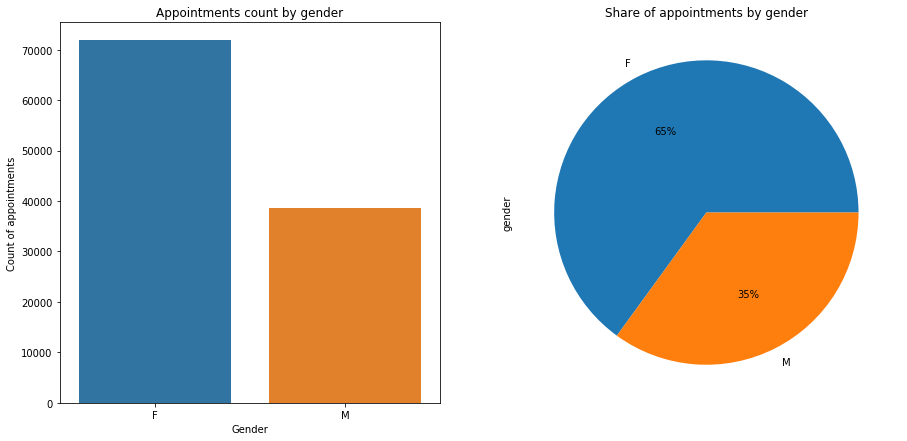

In [31]:
# there are more females scheduling appointments

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
count_plot(df, 'gender', 'Gender', 'Count of appointments', 'Appointments count by gender')

plt.subplot(1,2,2)
g2 = df["gender"].value_counts().plot(kind='pie',autopct='%1.0f%%')
g2.set(title = 'Share of appointments by gender')

plt.show()

Females seem to be either in more need of medical appointments or simply taking better care of their health.  
Let's check below whether this also means that they miss fewer of their appointments than males do.

In [32]:
# number of appointments by gender
gender_totals = df["gender"].value_counts()
gender_totals

F    71834
M    38687
Name: gender, dtype: int64

In [33]:
# calculate noshow counts by gender
no_show_by_gender = df.groupby(["gender", "no_show"]).count()["age"]
no_show_by_gender

gender  no_show
F       False      57243
        True       14591
M       False      30962
        True        7725
Name: age, dtype: int64

In [34]:
# calculating frequencies of noshows for females
no_show_proportions_female = no_show_by_gender['F'] / gender_totals['F']
# calculating frequencies of noshows for males
no_show_proportions_male = no_show_by_gender['M'] / gender_totals['M']
no_show_proportions_female, no_show_proportions_male

(no_show
 False    0.796879
 True     0.203121
 Name: age, dtype: float64, no_show
 False    0.800321
 True     0.199679
 Name: age, dtype: float64)

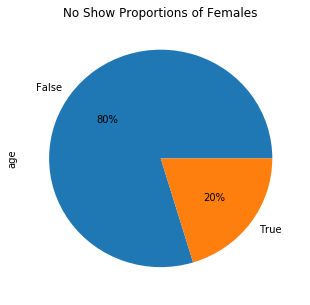

In [35]:
# Plotting the No Show Proportions of Females
plt.figure(figsize=(5,5))
females = no_show_proportions_female.plot(kind='pie',autopct='%1.0f%%')
females.set(title = 'No Show Proportions of Females')
plt.show()

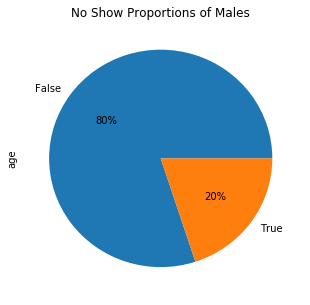

In [36]:
# Plotting the No Show Proportions of Females 
plt.figure(figsize=(5,5))
males = no_show_proportions_male.plot(kind='pie',autopct='%1.0f%%')
males.set(title = 'No Show Proportions of Males')
plt.show()

There is no large difference in noshow proportion among male and female patients.

# Handicaps vs Count of Appointments

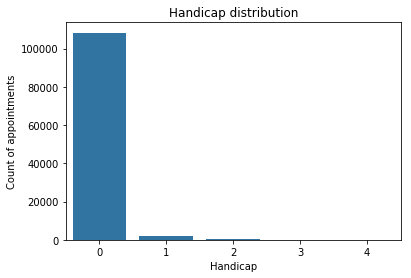

In [37]:
# most appointments are made by patients with no handicap
count_plot(df, "handicap", "Handicap", "Count of appointments", "Handicap distribution", sns.color_palette()[0])
plt.show()

# Handicaps vs Age

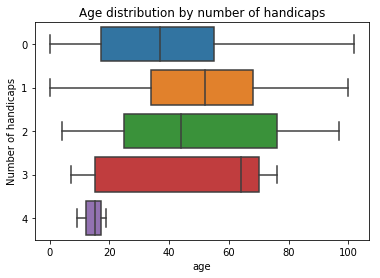

In [38]:
# age distribution for different handicap groups
# age distribution of patients with 4 handicaps is very different because we only have a very small sample of these patients
g = sns.boxplot(data = df, x = "age", y = "handicap")
g.set(xlabel="age", ylabel="Number of handicaps", title="Age distribution by number of handicaps")
plt.show()

# Handicaps vs No Show 

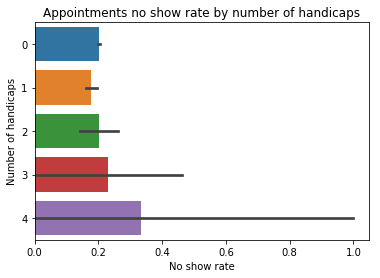

In [39]:
# number of handicaps does not make much of a difference in showing up
# (we can disregard 3 and 4 handicaps because there are just a few data points, as is suggested by the large error bars and distribution chart above)
g = sns.barplot(x = df["no_show"], y = df["handicap"])
g.set(xlabel = "No show rate", ylabel = "Number of handicaps", title = "Appointments no show rate by number of handicaps")
plt.show()

# Neighborhoods vs Count of Appointments & Neighborhoods vs No Show

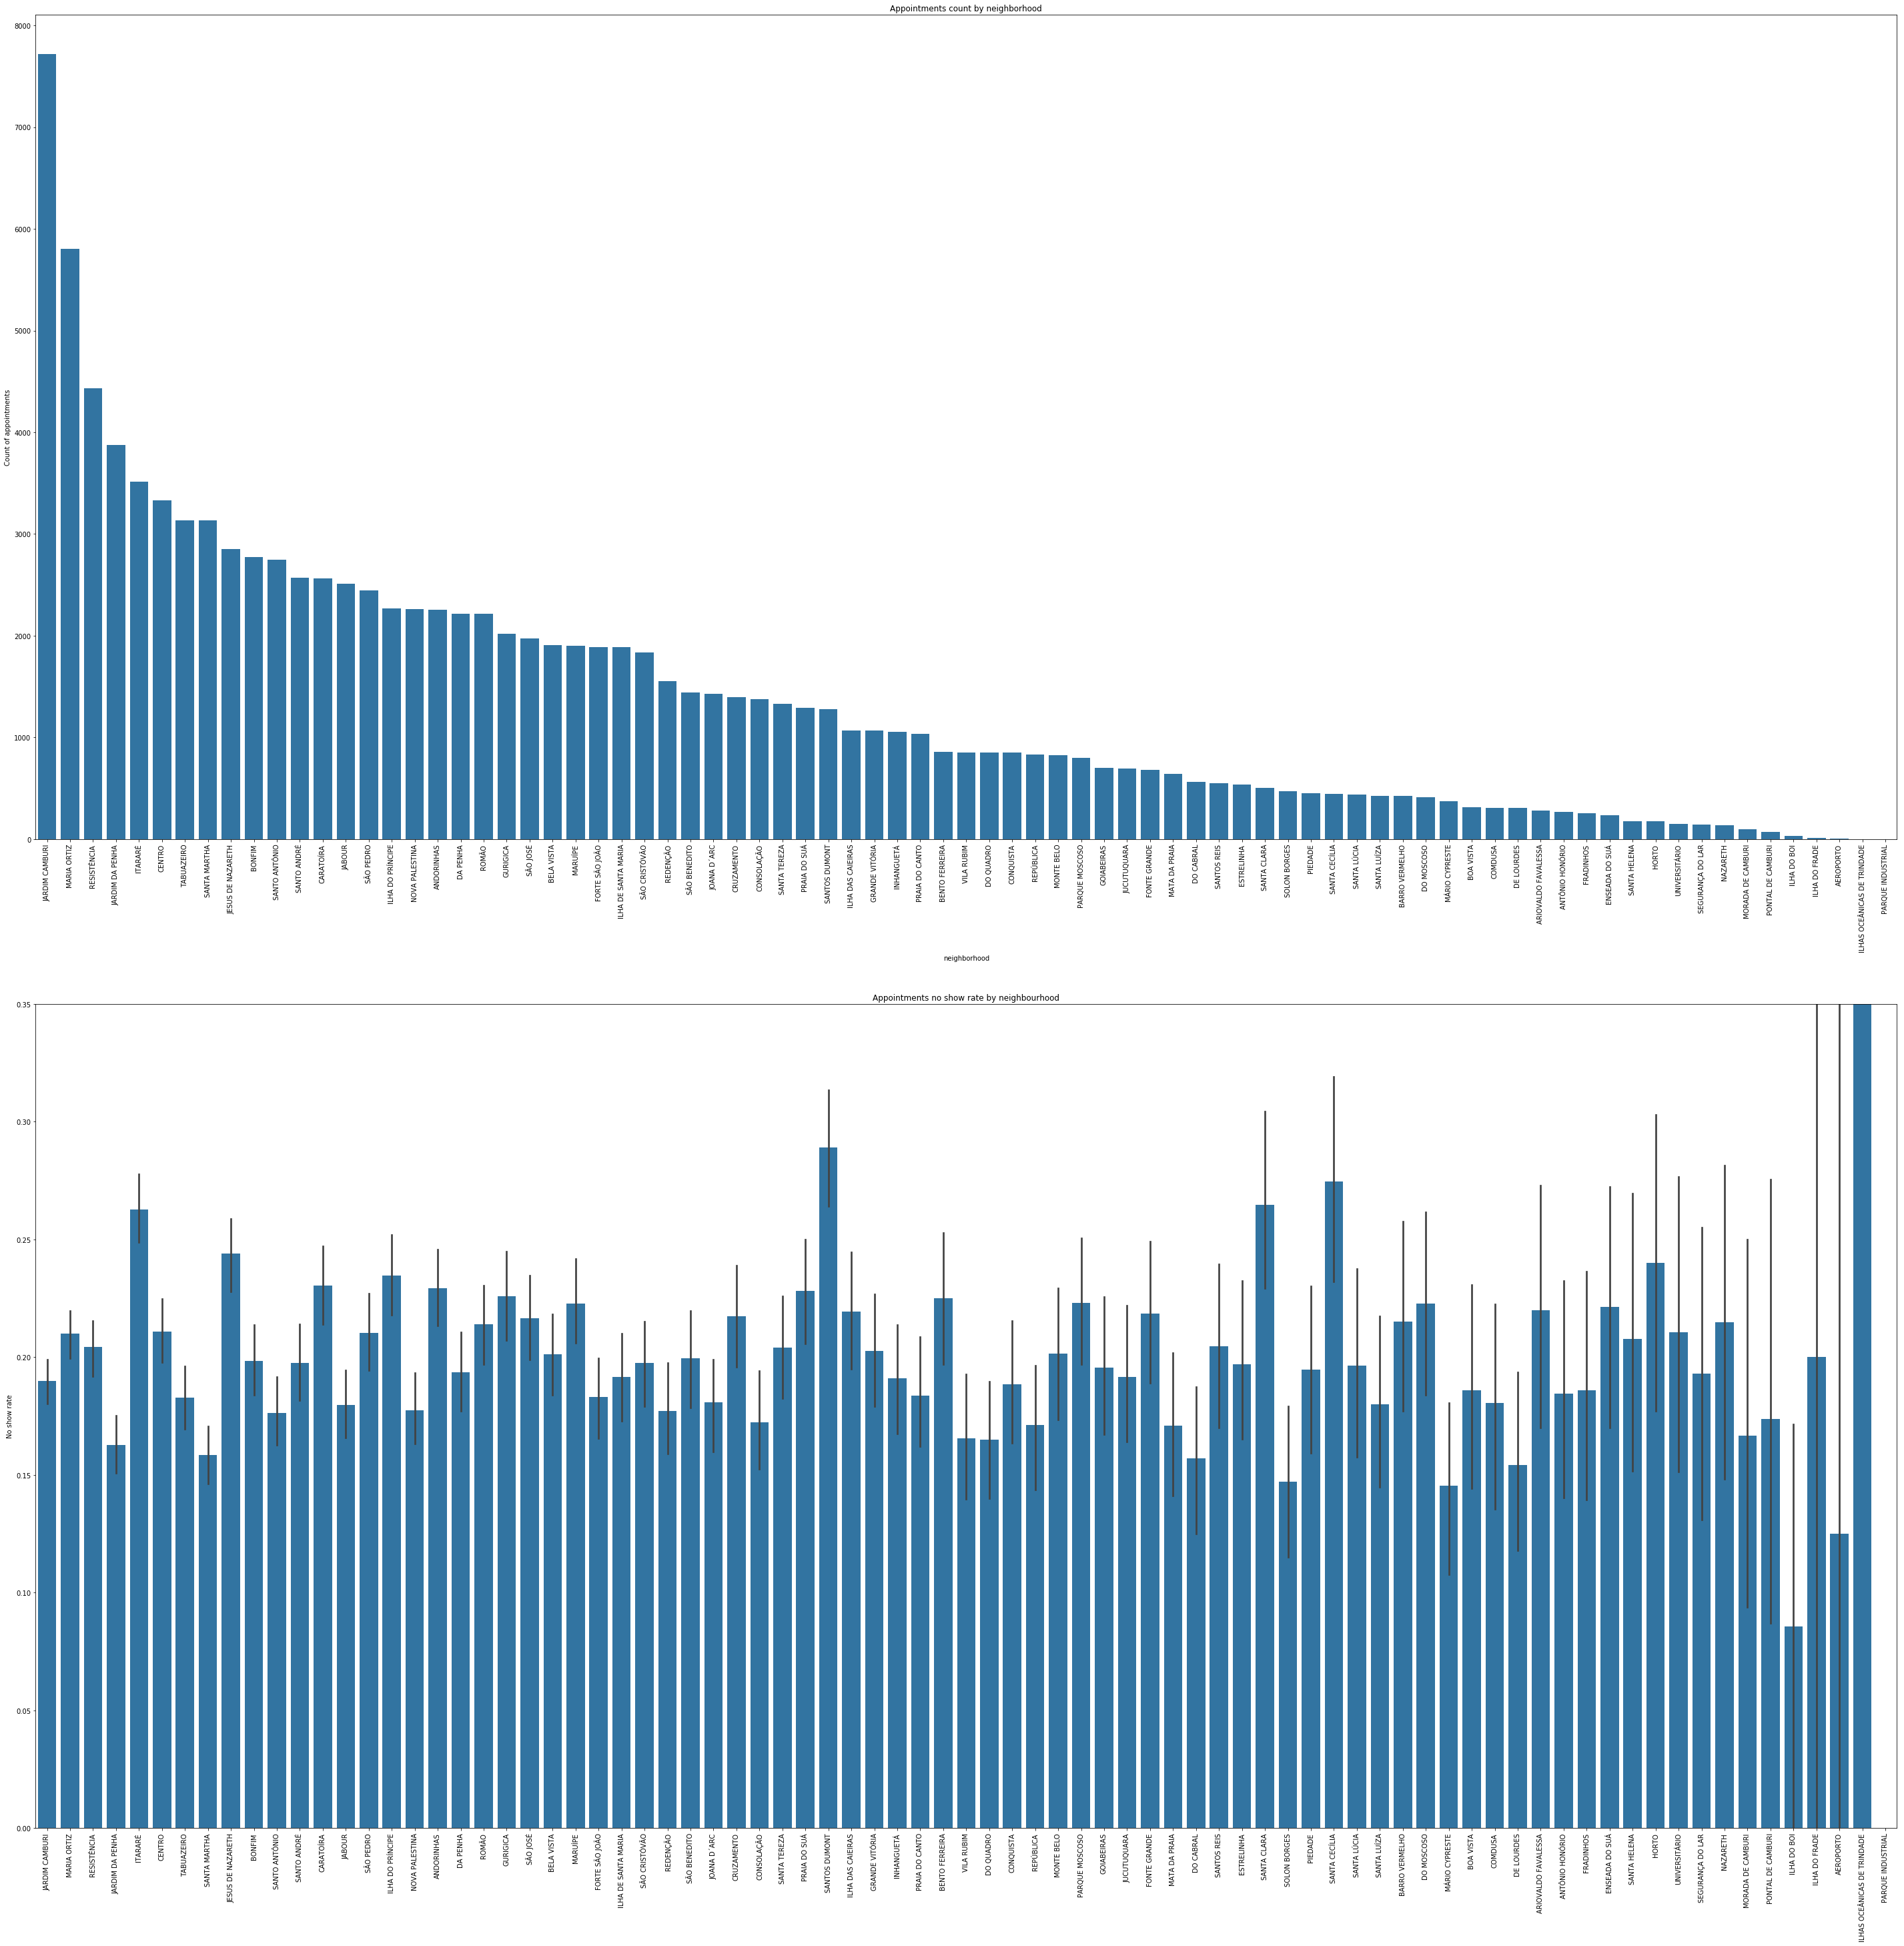

In [40]:
# share of neighborhoods
# there are a couple of very large neighborhoods by a number of appointments
plt.figure(figsize=(50,50))

plt.subplot(2, 1, 1)
plt.xticks(rotation=90)
g = sns.countplot(data = df, x = "neighborhood", order = df["neighborhood"].value_counts().index, \
                  color=sns.color_palette()[0])
g.set(ylabel = "Count of appointments", title = "Appointments count by neighborhood")

# neighbourhoods do not deviate widely from the overall average no show rate
plt.subplot(2, 1, 2)
plt.xticks(rotation=90)
g = sns.barplot(x = df["neighborhood"], y = df["no_show"], order = df["neighborhood"].value_counts().index, \
                color=sns.color_palette()[0]);
g.set_title("Appointments no show rate by neighbourhood")
g.set(ylabel="No show rate", ylim=(0,0.35), xlabel='')
g.axhline(no_show_proportions)

plt.show()

## Count Plots of Different Patient Characteristics

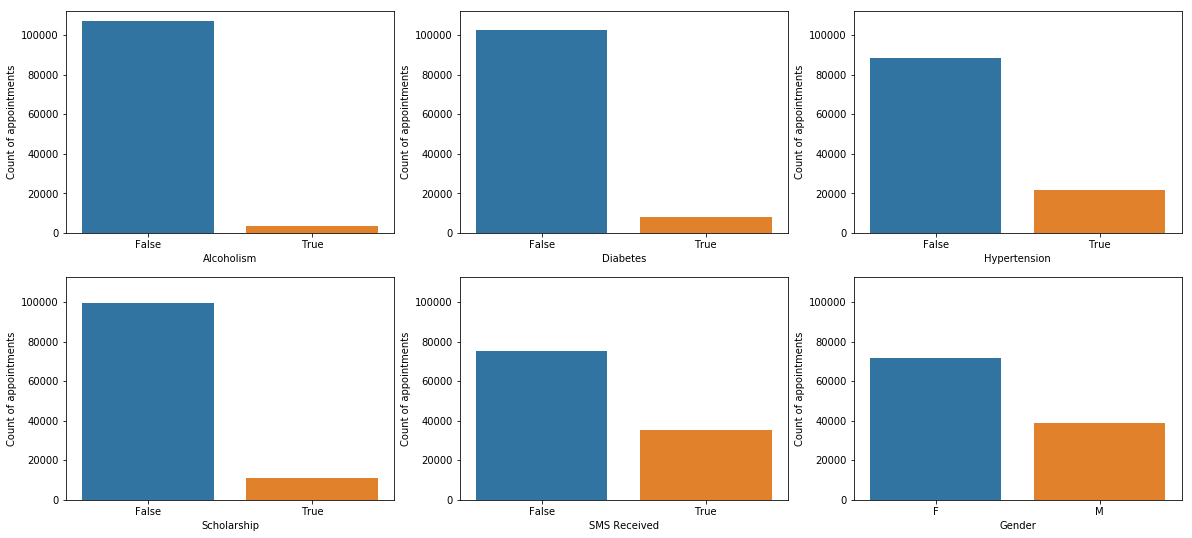

In [41]:
# subplots with amounts of appointments per characteristic value
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = count_plot(df, "alcoholism", "Alcoholism", "Count of appointments", "")

plt.subplot(2, 3, 2)
count_plot(df, "diabetes", "Diabetes", "Count of appointments", "")
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, "hypertension", "Hypertension", "Count of appointments", "")
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, "scholarship", "Scholarship", "Count of appointments", "")
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, "sms_received", "SMS Received", "Count of appointments", "")
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, "gender", "Gender", "Count of appointments", "")
plt.ylim(g1.get_ylim())

plt.show()

In [42]:
# plot details function to be used in the following bar charts
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(no_show_proportions, color='black')
    plt.ylim(g1.get_ylim())

In [ ]:
# subplots with no show rates per characteristic
# the overall no show rate is shown by a horizontal line
plt.figure(figsize = [20, 9])

plt.subplot(2, 3, 1)
g1 = bar_plot(df["alcoholism"], df["no_show"], 'Alcoholism', 'No show rate', '', 0)
plot_details(g1)

plt.subplot(2, 3, 2)
g2 = bar_plot(df["diabetes"], df["no_show"], 'Diabetes', 'No show rate', '', 0)
plot_details(g2)

plt.subplot(2, 3, 3)
g3 = bar_plot(df["hypertension"], df["no_show"], 'Hypertension', 'No show rate', '', 0)
plot_details(g3)

plt.subplot(2, 3, 4)
g4 = bar_plot(df["scholarship"], df["no_show"], 'Scholarship', 'No show rate', '', 0)
plot_details(g4)

plt.subplot(2, 3, 5)
g5 = bar_plot(df["sms_received"], df["no_show"], 'SMS Received', 'No show rate', '', 0)
plot_details(g5)

plt.subplot(2, 3, 6)
g6 = bar_plot(df["gender"], df["no_show"], 'Gender', 'No show rate', '', 0)
plot_details(g6)

plt.show()

<a id='conclusions'></a>
## Conclusions

<a id="q1"></a>
## What factors are crucial to predict if a patient will show up for their scheduled appointment?

**All answers are supported by the data above**
Answering this question, the factors directly impacting the no show rates are:-    

a) **Age**  
As age increases, the no show rate decreases ,thus, it's a negative correlation. Also, the count of appointments at a younger age is far greater than the count of appointments at an older age (age >= 50). According to the Age vs No Show bar plot and error bar, the negative correlation started to appear on the ages of 25+. According to the correlation table, Age, hypertension, and diabetes are positively correlated. It can be inferred that as age increases, patients are more likely to be diagnosed with hypertension and diabetes. Thus, decreasing the no show rate.  
  
b) **Different Characteristic Values**  
SMS Received and Scholarships **are useful variables** to help predict showing up to the appointment or not. A positive correlation is concluded from the final count plots.  
Diabetes and Hypertension **are useful variables** to help predict showing up to the appointment or not. A negative correlation is concluded from the final count plots.  
  


<a id="q2"></a>
## Does having a scholarship influence your showing up to the appointment?  

Scholarship is a useful variable to help predict showing up to the appointment or not. A positive correlation is concluded from the final count plots.

<a id="q3"></a>
## Does illness(hypertension, diabetes, alcoholism, handicap) have a direct impact on the patient's showing up to the appointment? 

**Diabetes** and **Hypertension are useful variables** to help predict showing up to the appointment or not. A negative correlation is concluded from the final count plots.  
**Alcoholism** does not affect the no show rate, so it is **not a useful variable** to help predict showing up to the appointment or not. A neutral correlation is concluded from the final count plots.  
**Handicap** has a negative correlation with the count of appointments. It is shown that as handicap increases, the count of appointments increases.
Handicaps vs Age boxplot shows that handicaps (0, 1, 2) are distributed over a variety of ages. Handicaps (3, 4) are low in samples and are distributed over a a much lower variety of ages. It can be concluded that handicaps **are not a useful variable** to predict showing up to the appointment or not. 

# Important Points
Appointments of alcoholics are skipped more frequently than the average appointments are.  

The count of appointments has a positive correlation with the popularity of the neighborhoods. Also, the same count of appointments related to the popularity of the neighborhood has a negative correlation with the no show rate.  
**Does this mean that as the neighborhood gets more popular, the no show rate increases?**  
No, the no show rate actually stays the same and does not deviate among the different neighborhood. It's a ratio trick.

# References
Thanks to the following gitHub repository. I confirm that I have submitted my own work with guidance from the following repository. However, questions asked, data wrangling, data cleaning, and conclusions were done with no help from the repository.
https://github.com/janamalesova/Udacity-Data-Analyst-Nanodegree

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0